<a href="https://colab.research.google.com/github/MohamedA2000/Machine-Learning-Projects/blob/main/Unsupervised_Learning_Clustering_using_KMeans_DBScan_and_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster 1:
(2, 5)
(1, 2)
Centroid: (1.5, 3.5)

Cluster 2:
(8, 4)
(7, 5)
(6, 4)
Centroid: (7.0, 4.333333333333333)

Cluster 3:
(2, 10)
(5, 8)
(4, 9)
Centroid: (3.6666666666666665, 9.0)



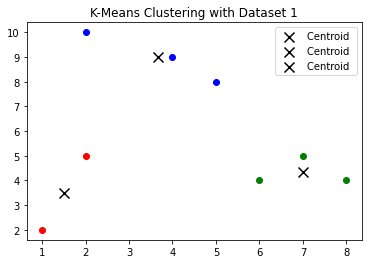

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

seeds = np.array([data_points[1], data_points[2], data_points[7]])

clusters = [[] for i in range(len(seeds))]

for point in data_points:
    distances = [np.linalg.norm(point - seed) for seed in seeds]
    cluster_index = np.argmin(distances)
    clusters[cluster_index].append(point)

centroids = [np.mean(cluster, axis=0) for cluster in clusters]

for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}:")
    for point in cluster:
        print(f"({point[0]}, {point[1]})")
    print(f"Centroid: ({centroids[i][0]}, {centroids[i][1]})\n")

colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], marker='x', s=100, color='black', label=f'Centroid ')
plt.title('K-Means Clustering with Dataset 1')
plt.legend()
plt.show()


Running the algorithim until the centroids do not change

In [ ]:
import numpy as np

data_points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

seeds = np.array([data_points[1], data_points[2], data_points[7]])

old_centroids = np.zeros(seeds.shape)
while not np.array_equal(seeds, old_centroids):
    clusters = [[] for i in range(len(seeds))]
    for point in data_points:
        distances = [np.linalg.norm(point - seed) for seed in seeds]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)
    old_centroids = np.copy(seeds)
    seeds = [np.mean(cluster, axis=0) for cluster in clusters]
seeds = np.array(seeds)

for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}:")
    for point in cluster:
        print(f"({point[0]}, {point[1]})")
    print(f"Centroid: ({seeds[i][0]}, {seeds[i][1]})\n")


Cluster 1:
(2, 5)
(1, 2)
Centroid: (1.5, 3.5)

Cluster 2:
(8, 4)
(7, 5)
(6, 4)
Centroid: (7.0, 4.333333333333333)

Cluster 3:
(2, 10)
(5, 8)
(4, 9)
Centroid: (3.6666666666666665, 9.0)



Since they did not change, the number of iterations needed to converge is 1.

Quesrion 5.

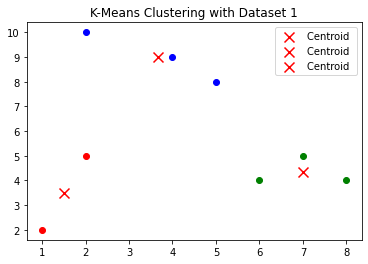

In [ ]:
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], marker='x', s=100, color='r', label=f'Centroid ')
plt.title('K-Means Clustering with Dataset 1')
plt.legend()
plt.show()

Question 6.

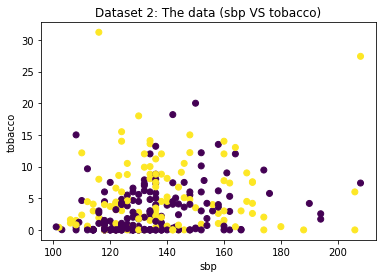

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv") #if you upload to your GitHub

columns = ['sbp', 'tobacco']

training_set_labels = np.array(data['chd'][0:299])
training_set_features = np.array(data[columns][0:299])

plt.scatter(training_set_features[:, 0], training_set_features[:, 1], c=training_set_labels)
plt.title('Dataset 2: The data (sbp VS tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.show()


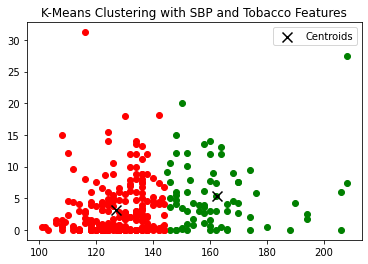

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

X = data[['sbp', 'tobacco']].values

X_train = X[:300]
X_test = X[300:]

np.random.seed(42)
centroids = np.zeros((2, 2))
centroids[:, 0] = np.random.uniform(min(X_train[:, 0]), max(X_train[:, 0]), size=2)
centroids[:, 1] = np.random.uniform(min(X_train[:, 1]), max(X_train[:, 1]), size=2)

prev_centroids = np.zeros(centroids.shape)
iteration = 0
converged = False

while not converged:
    # Assign each point to the nearest centroid
    distances = np.sqrt(np.sum((X_train - centroids[:, np.newaxis])**2, axis=2))
    labels = np.argmin(distances, axis=0)

    prev_centroids = centroids.copy()
    for j in range(2):
        centroids[j] = np.mean(X_train[labels == j], axis=0)

    converged = np.linalg.norm(centroids - prev_centroids) < 1e-6
    iteration += 1

# print(f"Number of iterations to get the correct centroid: {iteration}")

colors = ['r', 'g']
for i in range(len(X_train)):
    plt.scatter(X_train[i][0], X_train[i][1], color=colors[labels[i]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')
plt.title('K-Means Clustering with SBP and Tobacco Features')
plt.legend()
plt.show()

test_labels = np.argmin(np.sqrt(np.sum((X_test - centroids[:, np.newaxis])**2, axis=2)), axis=0)


TESTING ACCURACY

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv") #if you upload to your GitHub

X = data[['sbp', 'tobacco']].values
y = data['chd'].values

X_train = X[:300]
X_test = X[300:]
y_test = y[300:]
np.random.seed(42)
centroids = np.zeros((2, 2))
centroids[:, 0] = np.random.uniform(min(X_train[:, 0]), max(X_train[:, 0]), size=2)
centroids[:, 1] = np.random.uniform(min(X_train[:, 1]), max(X_train[:, 1]), size=2)

for i in range(100):
    # Assign each point to the nearest centroid
    distances = np.sqrt(np.sum((X_train - centroids[:, np.newaxis])**2, axis=2))
    labels = np.argmin(distances, axis=0)

    # Update the centroids
    for j in range(2):
        centroids[j] = np.mean(X_train[labels == j], axis=0)

test_labels = np.argmin(np.sqrt(np.sum((X_test - centroids[:, np.newaxis])**2, axis=2)), axis=0)

# Calculate the accuracy
tp = sum((test_labels == 1) & (y_test == 1))
tn = sum((test_labels == 0) & (y_test == 0))
fp = sum((test_labels == 1) & (y_test == 0))
fn = sum((test_labels == 0) & (y_test == 1))
accuracy = (tp + tn) / (tp + tn + fp + fn)

print('Accuracy:', accuracy)


Accuracy: 0.6790123456790124


TRAINING ACCURACY

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv") #if you upload to your GitHub

X = data[['sbp', 'tobacco']].values
y = data['chd'].values

X_train = X[:163]
X_test = X[163:]
y_test = y[163:]

np.random.seed(42)
centroids = np.zeros((2, 2))
centroids[:, 0] = np.random.uniform(min(X_train[:, 0]), max(X_train[:, 0]), size=2)
centroids[:, 1] = np.random.uniform(min(X_train[:, 1]), max(X_train[:, 1]), size=2)

for i in range(100):
    # Assign each point to the nearest centroid
    distances = np.sqrt(np.sum((X_train - centroids[:, np.newaxis])**2, axis=2))
    labels = np.argmin(distances, axis=0)

    # Update the centroids
    for j in range(2):
        centroids[j] = np.mean(X_train[labels == j], axis=0)

test_labels = np.argmin(np.sqrt(np.sum((X_test - centroids[:, np.newaxis])**2, axis=2)), axis=0)

#  accuracy
tp = sum((test_labels == 1) & (y_test == 1))
tn = sum((test_labels == 0) & (y_test == 0))
fp = sum((test_labels == 1) & (y_test == 0))
fn = sum((test_labels == 0) & (y_test == 1))
accuracy = (tp + tn) / (tp + tn + fp + fn)

print('Accuracy:', accuracy)


Accuracy: 0.6187290969899666


QUESTION 7

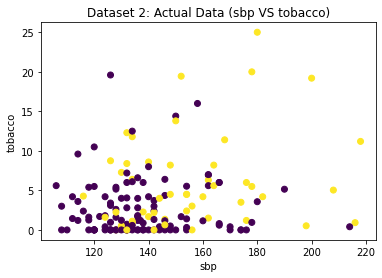

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv") #if you upload to your GitHub

columns = ['sbp', 'tobacco']


training_set_labels = np.array(data['chd'][300:463])
training_set_features = np.array(data[columns][300:463])


plt.scatter(training_set_features[:, 0], training_set_features[:, 1], c=training_set_labels)
plt.title('Dataset 2: Actual Data (sbp VS tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.show()


QUESTION 8 

<ipython-input-17-9b69dade58a1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cluster'] = np.argmin(distances, axis=0)


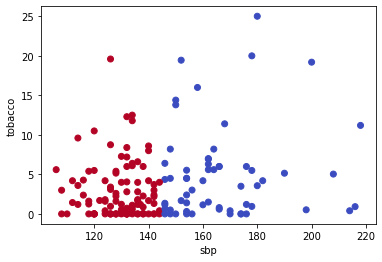

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv") #if you upload to your GitHub

data['chd'] = data['chd'].apply(lambda x: 1 if x == 'Present' else 0)

train_data = data[:300]
test_data = data[300:]

def kmeans(X, K, max_iterations=100):
    # Initialize K random centroids from the data points
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    
    for iteration in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        for k in range(K):
            centroids[k] = X[labels == k].mean(axis=0)
    
    return centroids

centroids = kmeans(train_data[['sbp', 'tobacco']].values, 2)

distances = np.sqrt(((test_data[['sbp', 'tobacco']].values - centroids[:, np.newaxis])**2).sum(axis=2))
test_data['cluster'] = np.argmin(distances, axis=0)

plt.scatter(test_data['sbp'], test_data['tobacco'], c=test_data['cluster'], cmap='coolwarm')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.show()


PART B

QUESTION 9

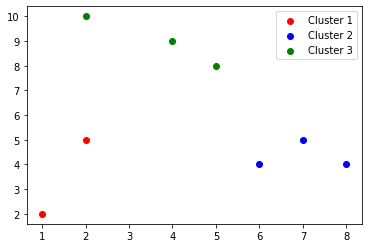

Cluster 1: [(1, 2), (2, 5)]
Cluster 2: [(8, 4), (7, 5), (6, 4)]
Cluster 3: [(5, 8), (4, 9), (2, 10)]


In [ ]:
import math
import matplotlib.pyplot as plt

dataset = [(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)]

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def find_nearest_neighbor(point, dataset, threshold):
    nearest_neighbor = None
    min_distance = float('inf')
    for neighbor in dataset:
        distance = euclidean_distance(point, neighbor)
        if distance < min_distance and distance <= threshold:
            nearest_neighbor = neighbor
            min_distance = distance
    return nearest_neighbor

def nn_clustering(dataset, threshold):
    clusters = []
    unclustered_points = set(dataset)
    while unclustered_points:
        point = unclustered_points.pop()
        cluster = [point]
        nearest_neighbor = find_nearest_neighbor(point, unclustered_points, threshold)
        while nearest_neighbor:
            cluster.append(nearest_neighbor)
            unclustered_points.remove(nearest_neighbor)
            nearest_neighbor = find_nearest_neighbor(nearest_neighbor, unclustered_points, threshold)
        clusters.append(cluster)
    return clusters

clusters = nn_clustering(dataset, 4)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
for i, cluster in enumerate(clusters):
    x = [point[0] for point in cluster]
    y = [point[1] for point in cluster]
    plt.scatter(x, y, c=colors[i % len(colors)], label=f"Cluster {i+1}")
plt.legend()
plt.show()
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")


Yes, by doing nn clustering, I get the same result as k-means.

Question 11: 

After runnning both algorithims, I found they were extremeley similar in that they both took several seconds to run, and the results were idential, with the same clusters being created. After doing some research about these algorithims and their uses with large datasets, I found that because of the time complexity of k-mena clustering being O(n^2), it can potentially get more expensive with more data, using more computing power in the process. Meanwhile, nearest neighbour has a similar issue as k-means in regard to the time complexity, but another disadvantage of nearest neighbour is that it is quite difficult to choose a threshold value that works well with large datasets.

PART B 

QUESTION 12

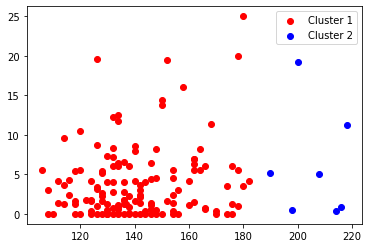

Cluster 1: [(180.0, 25.01), (178.0, 20.0), (168.0, 11.4), (164.0, 8.2), (162.0, 7.0), (162.0, 6.94), (162.0, 6.3), (162.0, 5.6), (164.0, 5.6), (166.0, 6.0), (166.0, 0.8), (166.0, 0.6), (170.0, 0.4), (170.0, 0.0), (174.0, 0.0), (176.0, 0.0), (176.0, 1.2), (178.0, 0.95), (180.0, 3.57), (182.0, 4.2), (178.0, 5.5), (176.0, 6.0), (174.0, 3.5), (162.0, 1.5), (160.0, 1.15), (160.0, 4.2), (156.0, 3.02), (154.0, 2.4), (154.0, 1.4), (154.0, 0.31), (154.0, 0.0), (156.0, 0.0), (152.0, 1.68), (150.0, 0.0), (148.0, 0.0), (148.0, 0.5), (146.0, 0.64), (146.0, 1.16), (146.0, 1.35), (146.0, 0.0), (144.0, 0.0), (144.0, 0.4), (142.0, 0.0), (142.0, 1.32), (142.0, 2.2), (142.0, 2.4), (142.0, 3.0), (142.0, 3.72), (144.0, 4.0), (146.0, 4.36), (148.0, 4.5), (146.0, 6.4), (148.0, 8.2), (150.0, 13.8), (150.0, 14.4), (152.0, 19.45), (158.0, 16.0), (154.0, 5.53), (154.0, 4.5), (140.0, 4.2), (140.0, 1.68), (140.0, 0.0), (138.0, 0.0), (138.0, 0.06), (138.0, 0.87), (137.0, 1.2), (136.0, 1.2), (136.0, 1.7), (136.0, 1.

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

X = data[['sbp', 'tobacco']].values

X_train = X[:300]
X_test = X[300:]
# y_test = y[:463]

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def find_nearest_neighbor(point, dataset, threshold):
    nearest_neighbor = None
    min_distance = float('inf')
    for neighbor in dataset:
        distance = euclidean_distance(point, neighbor)
        if distance < min_distance and distance <= threshold:
            nearest_neighbor = neighbor
            min_distance = distance
    return nearest_neighbor

def nn_clustering(dataset, threshold):
    clusters = []
    unclustered_points = set(tuple(point) for point in dataset)
    while unclustered_points:
        point = unclustered_points.pop()
        cluster = [point]
        nearest_neighbor = find_nearest_neighbor(point, unclustered_points, threshold)
        while nearest_neighbor:
            cluster.append(nearest_neighbor)
            unclustered_points.remove(nearest_neighbor)
            nearest_neighbor = find_nearest_neighbor(nearest_neighbor, unclustered_points, threshold)
        clusters.append(cluster)
    return clusters

clusters = nn_clustering(X_test, 20)

colors = ['red', 'blue', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
for i, cluster in enumerate(clusters):
    x = [point[0] for point in cluster]
    y = [point[1] for point in cluster]
    plt.scatter(x, y, c=colors[i % len(colors)], label=f"Cluster {i+1}")
plt.legend()
plt.show()

for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")






PART C

QUESTION 13

Cluster 0: []
Cluster 1: [(8, 4), (7, 5), (7, 5), (6, 4), (6, 4)]
Cluster 2: [(5, 8), (4, 9), (4, 9)]
Outlier: [(2, 10), (2, 5), (1, 2)]


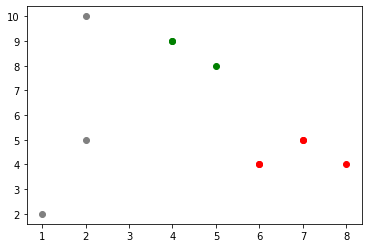

In [ ]:
import math
import matplotlib.pyplot as plt

data = [(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)]

epsilon = 2
minpoint = 2

def distance(p, q):
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)

def get_neighbors(point):
    neighbors = []
    for p in data:
        if distance(point, p) <= epsilon:
            neighbors.append(p)
    return neighbors

def expand_cluster(point, cluster_id, visited_points, clusters):
    neighbors = get_neighbors(point)
    if len(neighbors) < minpoint:
        clusters[cluster_id]['outlier'].append(point)
        return False
    else:
        clusters[cluster_id]['cluster'].append(point)
        visited_points.append(point)
        for neighbor in neighbors:
            if neighbor not in visited_points:
                clusters[cluster_id]['cluster'].append(neighbor)
                visited_points.append(neighbor)
                expand_cluster(neighbor, cluster_id, visited_points, clusters)
        return True

def dbscan(data, epsilon, minpoint):
    cluster_id = 0
    visited_points = []
    clusters = {cluster_id: {'cluster': [], 'outlier': []}}
    for point in data:
        if point not in visited_points:
            visited_points.append(point)
            neighbors = get_neighbors(point)
            if len(neighbors) < minpoint:
                clusters[cluster_id]['outlier'].append(point)
            else:
                cluster_id += 1
                clusters[cluster_id] = {'cluster': [], 'outlier': []}
                if expand_cluster(point, cluster_id, visited_points, clusters):
                    continue
                else:
                    clusters[cluster_id]['outlier'].append(point)

    all_outlier_points = []
    for cluster in clusters.values():
        all_outlier_points += cluster['outlier']

    return {'clusters': clusters, 'outlier': all_outlier_points}

results = dbscan(data, epsilon, minpoint)
for cluster_id, cluster in results['clusters'].items():
    print('Cluster {}: {}'.format(cluster_id, cluster['cluster']))
print('Outlier: {}'.format(results['outlier']))


results = dbscan(data, epsilon, minpoint)
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']
fig, ax = plt.subplots()
for cluster_id, cluster in results['clusters'].items():
    for point in cluster['cluster']:
        ax.scatter(point[0], point[1], c=colors[cluster_id%len(colors)])
for point in results['outlier']:
    ax.scatter(point[0], point[1], c='gray')
plt.show()


QUESTION 14

Cluster 0: []
Cluster 1: [(2, 10), (4, 9), (4, 9), (5, 8), (5, 8)]
Cluster 2: [(2, 5), (1, 2), (1, 2)]
Cluster 3: [(8, 4), (7, 5), (7, 5), (6, 4), (6, 4)]
Outlier: []


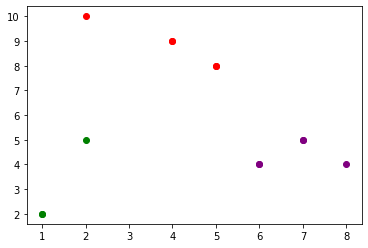

In [ ]:
import math
import matplotlib.pyplot as plt

data = [(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)]

epsilon = math.sqrt(10)
minpoint = 2

def distance(p, q):
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)

def get_neighbors(point):
    neighbors = []
    for p in data:
        if distance(point, p) <= epsilon:
            neighbors.append(p)
    return neighbors

def expand_cluster(point, cluster_id, visited_points, clusters):
    neighbors = get_neighbors(point)
    if len(neighbors) < minpoint:
        clusters[cluster_id]['outlier'].append(point)
        return False
    else:
        clusters[cluster_id]['cluster'].append(point)
        visited_points.append(point)
        for neighbor in neighbors:
            if neighbor not in visited_points:
                clusters[cluster_id]['cluster'].append(neighbor)
                visited_points.append(neighbor)
                expand_cluster(neighbor, cluster_id, visited_points, clusters)
        return True

def dbscan(data, epsilon, minpoint):
    cluster_id = 0
    visited_points = []
    clusters = {cluster_id: {'cluster': [], 'outlier': []}}
    for point in data:
        if point not in visited_points:
            visited_points.append(point)
            neighbors = get_neighbors(point)
            if len(neighbors) < minpoint:
                clusters[cluster_id]['outlier'].append(point)
            else:
                cluster_id += 1
                clusters[cluster_id] = {'cluster': [], 'outlier': []}
                if expand_cluster(point, cluster_id, visited_points, clusters):
                    continue
                else:
                    clusters[cluster_id]['outlier'].append(point)

    all_outlier_points = []
    for cluster in clusters.values():
        all_outlier_points += cluster['outlier']

    return {'clusters': clusters, 'outlier': all_outlier_points}

results = dbscan(data, epsilon, minpoint)
for cluster_id, cluster in results['clusters'].items():
    print('Cluster {}: {}'.format(cluster_id, cluster['cluster']))
print('Outlier: {}'.format(results['outlier']))


results = dbscan(data, epsilon, minpoint)
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']
fig, ax = plt.subplots()
for cluster_id, cluster in results['clusters'].items():
    for point in cluster['cluster']:
        ax.scatter(point[0], point[1], c=colors[cluster_id%len(colors)])
for point in results['outlier']:
    ax.scatter(point[0], point[1], c='gray')
plt.show()
# NOT SURE WHY CLUSTER 0 KEEPS GETTING SKIPPED :(

PART C, DATASET 2

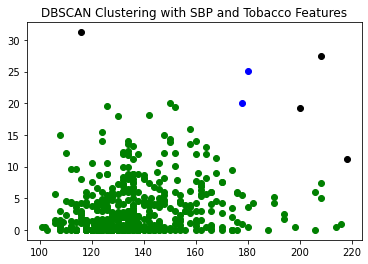

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

X = data[['sbp', 'tobacco']].values

def dbscan(X, eps, min_pts):
    labels = np.zeros(len(X))
    visited = np.zeros(len(X), dtype=bool)

    cluster_count = 0

    for i in range(len(X)):
        if visited[i]:
            continue

        visited[i] = True

        neighbors = []
        for j in range(len(X)):
            if np.linalg.norm(X[i] - X[j]) < eps:
                neighbors.append(j)

        if len(neighbors) < min_pts:
            labels[i] = -1
        else:
            cluster_count += 1
            labels[i] = cluster_count
            expand_cluster(X, labels, visited, neighbors, cluster_count, eps, min_pts)

    return labels.astype(int)  # cast labels to int

def expand_cluster(X, labels, visited, neighbors, cluster_count, eps, min_pts):
    for i in neighbors:
        if not visited[i]:
            visited[i] = True

            new_neighbors = []
            for j in range(len(X)):
                if np.linalg.norm(X[i] - X[j]) < eps:
                    new_neighbors.append(j)

            if len(new_neighbors) >= min_pts:
                for neighbor in new_neighbors:
                    if neighbor not in neighbors:
                        neighbors.append(neighbor)

        if labels[i] == 0:
            labels[i] = cluster_count

labels = dbscan(X, eps=10, min_pts=2)

colors = ['r', 'g', 'b', 'y', 'm']
for i in range(len(X)):
    if labels[i] == -1:  # assign a unique color to noise points
        plt.scatter(X[i][0], X[i][1], color='k')
    else:
        plt.scatter(X[i][0], X[i][1], color=colors[labels[i] % len(colors)])
plt.title('DBSCAN Clustering with SBP and Tobacco Features')
plt.show()


PART D


PART D For PART A: DATASET 1

comparing the two results, I found that using sklearn produced the same result as not using sklearn, with sklearn using less resources and computing time, it is the better choice to use in this situation.

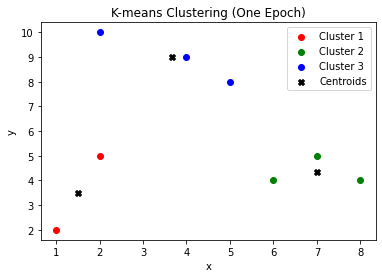

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.array([[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]])

seeds = np.array([X[1], X[2], X[7]])

k = 3

kmeans = KMeans(n_clusters=k, init=seeds, n_init=1).fit(X)

plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], color='green', label='Cluster 2')
plt.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1], color='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='black', label='Centroids')
plt.title('K-means Clustering (One Epoch)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




PART D FOR PART A: DATASET 2

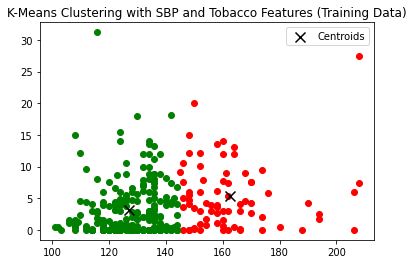

Accuracy for test sample: 0.6790123456790124


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

X = data[['sbp', 'tobacco']].values

X_train = X[:300]
X_test = X[300:]

kmeans = KMeans(n_clusters=2, init='random', n_init='auto', random_state=10)

kmeans.fit(X_train)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

colors = ['r', 'g']
for i in range(len(X_train)):
    plt.scatter(X_train[i][0], X_train[i][1], color=colors[labels[i]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')
plt.title('K-Means Clustering with SBP and Tobacco Features (Training Data)')
plt.legend()
plt.show()

test_labels = kmeans.predict(X_test)

test_actual = data['chd'][300:].values

cm = confusion_matrix(test_actual, test_labels)
tn, fp, fn, tp = confusion_matrix(test_actual, test_labels).ravel()
print('Accuracy for test sample:',  (1-(tp+tn)/(tp+tn+fp+fn)))


Comparing this with the non- SKlearn, it is once again identical in identfiying the centroids, and dividing the two clutsers. The accuracies are also almost identical.

PART D FOR PART B: DATASET 1

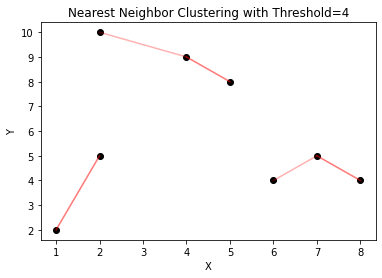

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

nbrs = NearestNeighbors(n_neighbors=2, radius=4, algorithm='auto')

nbrs.fit(X)

distances, indices = nbrs.kneighbors(X)

plt.scatter(X[:, 0], X[:, 1], c='black')

for i in range(len(X)):
    for j in indices[i]:
        plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], c='red', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nearest Neighbor Clustering with Threshold=4')

plt.show()


SKLEARN NEAREST NEIGHBOUR DATASET2


Accuracy: 0.5802469135802469


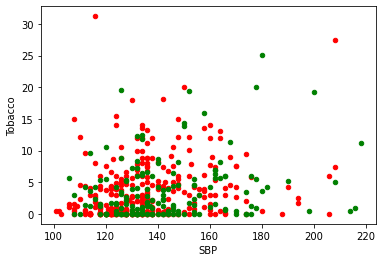

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

X = data[['sbp', 'tobacco']].values
y = data['chd'].values

X_train = X[:300]
y_train = y[:300]
X_test = X[300:]
y_test = y[300:]

nn = NearestNeighbors(n_neighbors=5)

nn.fit(X_train)

distances, indices = nn.kneighbors(X_test)

y_pred = np.array([np.bincount(y_train[indices[i]]).argmax() for i in range(len(X_test))])

cm = confusion_matrix(y_test, y_pred)

accuracy = np.trace(cm) / np.sum(cm)
print("Accuracy:", accuracy)

plt.scatter(X_train[:, 0], X_train[:, 1], c='red', s=20)
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20)
plt.xlabel("SBP")
plt.ylabel("Tobacco")
plt.show()


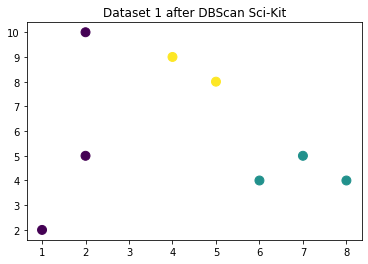

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])

dbScan = DBSCAN(eps=2, min_samples=2).fit(data)
plt.scatter(data[:, 0], data[:, 1],c=dbScan.labels_,s=80);
plt.title('Dataset 1 after DBScan Sci-Kit')
plt.show()


SKLEARN DBSCAN FOR DATASET 2

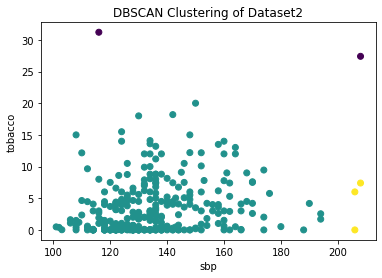

Accuracy: 0.4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")


# pre Prepare data 
train_data = data.iloc[:300, :]
test_data = data.iloc[300:, :]

features = ['sbp', 'tobacco']
X_train = train_data[features].values
X_test = test_data[features].values


dbscan = DBSCAN(eps=10, min_samples=2)
dbscan.fit(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=dbscan.labels_)
plt.title('DBSCAN Clustering of Dataset2')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.show()


y_pred = dbscan.fit_predict(X_test)
labels = dbscan.labels_
tp = sum((y_pred == 1) & (test_data['chd'] == 1))
tn = sum((y_pred == -1) & (test_data['chd'] == 0))
fp = sum((y_pred == 1) & (test_data['chd'] == 0))
fn = sum((y_pred == -1) & (test_data['chd'] == 1))

#  accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy:', accuracy)

QUESTION 1:

Q:What are the different metrics used to evaluate the performance of different clustering algorithms?

A:Some of these metrics include SSE and MSE, as well as Silhouette Coefficient, and the Davies-Bouldin Index. 

QUESTION 2:

Q:Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

A: Again, we can use the silhgouette coefficent, a metric used to calculate the goodness of a clustering technique by measruing how similar an object is to its own cluster compared to other clusters, or the Davies-Bouldin index, which measures the average similarity between each cluster and its most similar one